In [43]:
# Data manipulation
import numpy as np
import pandas as pd

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Reference library for traditional machine learning models
from sklearn.svm import SVC
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split


# Convenience to work with the files
from pathlib import Path

In [44]:
import os
os.chdir(r'D:\2nd_semester\data_mining\Project')

## Our dataset

The dataset is composed of many nump specific files. They are a zipped file containing a dictionary of header and variable. 

In [45]:
data_dir = Path(r'D:\2nd_semester\data_mining\Project\Data_demo\edf_npzs')
all_filepaths = [path for path in data_dir.glob('*.txt.npz')]
all_data_files = [np.load(path, allow_pickle=True) for path in all_filepaths]

In [46]:
# A sample of our data

sample = {header: data for header, data in zip(list(all_data_files[0].keys()), list(all_data_files[0].values()))}
sample

{'x': array([[[ -5.1516485 ],
         [ -7.9010987 ],
         [  4.624176  ],
         ...,
         [  9.308425  ],
         [  7.271795  ],
         [  0.5509158 ]],
 
        [[  7.5772896 ],
         [  4.9296703 ],
         [-11.770696  ],
         ...,
         [ 18.676924  ],
         [ 10.021245  ],
         [ 15.927472  ]],
 
        [[  4.827839  ],
         [ 12.2615385 ],
         [ 30.69304   ],
         ...,
         [  6.5589743 ],
         [ 10.530403  ],
         [  5.7443223 ]],
 
        ...,
 
        [[ -0.8747253 ],
         [  3.9113553 ],
         [ -9.530403  ],
         ...,
         [-10.446886  ],
         [ -5.9663005 ],
         [-15.232967  ]],
 
        [[-19.102564  ],
         [-21.342857  ],
         [-27.758242  ],
         ...,
         [ 39.654213  ],
         [ 23.055677  ],
         [  5.5406594 ]],
 
        [[ -5.457143  ],
         [  2.8930402 ],
         [  3.1985347 ],
         ...,
         [  7.5772896 ],
         [ 12.770696  ],
      

In [47]:
# Extracting all our features and labels

headers = list(sample.keys())
X = np.vstack([file['x'] for file in all_data_files])
y = np.hstack([file['y'] for file in all_data_files])

In [48]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# Verifying that all our data is labeled

X.shape, y.shape

((80649, 3000, 1), (80649,))

Text(0.5, 1.0, 'Frequency of the labels in our dataset')

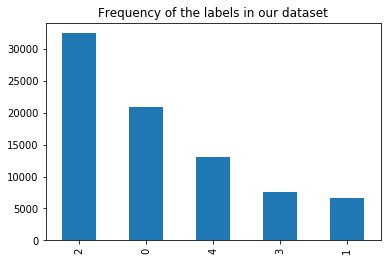

In [9]:
pd.Series(y).value_counts().plot.bar()
plt.title("Frequency of the labels in our dataset")

Since our data is a 3000 dimension vector we cannot do any exploratory analysis. At this stage we could perform dimensionaly reduction in order to filter out the noise in our dataset.

## 2. Data Processing

## Splitting the train and test datasets

### Normalizing the data

We can normalize our variables to have zero mean and variance one, by doing this we void many numerical instabilities that could happen during the training process.

In [49]:
scaler = StandardScaler()
X = scaler.fit_transform(X.squeeze())

In [12]:
n = 2000

X_sample = X[:n, :n]
y_sample = y[:n]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_sample.squeeze(), y_sample, test_size=0.2, random_state=42)

In [69]:
xsample = X[1:1000]
xsample

array([[ 3.7227350e-01,  2.5047490e-01, -5.5026758e-01, ...,
         8.9107215e-01,  4.7720954e-01,  7.7152467e-01],
       [ 2.3932189e-01,  6.0483837e-01,  1.4994127e+00, ...,
         3.0434963e-01,  5.0184047e-01,  2.7895656e-01],
       [ 6.5787327e-01,  9.7901732e-02,  2.4822559e-02, ...,
         1.2685373e-01,  2.8508860e-01,  2.0507134e-01],
       ...,
       [ 9.5332134e-01,  8.5584587e-01,  1.0472050e+00, ...,
         5.1142812e-01,  5.9051168e-01,  4.1194993e-01],
       [ 3.7719765e-01,  1.6680574e-01,  2.4605708e-04, ...,
        -3.0920368e-02,  1.4222945e-01, -1.6928045e-01],
       [-9.5519252e-02, -1.4326231e-01, -4.6670747e-01, ...,
         5.8538473e-01,  2.9001477e-01,  2.8388223e-01]], dtype=float32)

In [57]:
# cluster the data into five clusters
dbscan = DBSCAN(eps = 0.085,min_samples = 3)
model = dbscan.fit(xsample)
labels = model.labels_


In [70]:
from sklearn.cluster import KMeans
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(xsample)
print(y_kmeans5)

kmeans5.cluster_centers_

[2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 1 3 1 1 2 2 3 2 2 2
 2 2 3 1 2 1 0 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2
 2 2 2 2 2 2 3 2 3 1 2 1 2 2 1 2 2 2 1 2 1 1 3 2 3 3 2 3 2 3 2 2 2 3 2 3 3
 0 2 3 3 2 3 2 2 3 2 2 2 2 3 3 2 2 1 2 1 2 3 3 2 2 2 3 2 2 1 2 2 2 2 3 3 2
 0 3 3 2 1 2 2 1 1 2 1 3 0 1 4 2 1 2 2 2 2 2 3 2 1 1 0 2 3 2 2 2 3 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 2 2 2 2 3 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 1 2 1 2 1 1 3 3 1 3 0 2 2
 2 2 1 3 2 1 1 2 3 3 3 3 1 2 2 3 2 3 2 2 1 2 3 1 2 2 1 3 2 1 2 3 2 3 2 2 3
 1 2 3 2 1 2 3 2 2 2 3 2 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 1 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 1 2 2 1 2 2 2 2 2 3 2 1 2 2 2 2
 2 2 2 2 3 3 3 2 2 3 2 2 

array([[-0.22650129, -0.39525416, -0.49374154, ...,  1.3791858 ,
         1.6338761 ,  1.5813066 ],
       [-0.01234133, -0.02733597, -0.05687766, ..., -0.1411224 ,
        -0.2153845 , -0.24735919],
       [ 0.04101356,  0.05860659,  0.06907236, ...,  0.03942624,
         0.02254266,  0.04952508],
       [ 0.07135963,  0.05400001, -0.00176923, ..., -0.0510366 ,
        -0.0628474 , -0.05815711],
       [-0.5337672 , -0.8273807 , -1.0663741 , ..., -0.5732689 ,
        -0.05974386,  0.1361118 ]], dtype=float32)

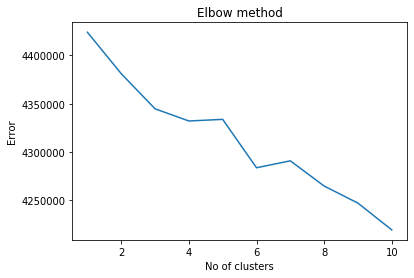

In [71]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(xsample)
    kmeans.fit(xsample)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [58]:
from sklearn import metrics
core_samples = np.zeros_like(labels, dtype=bool)
core_samples[dbscan.core_sample_indices_] = True
#print(core_samples)

In [60]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

0

In [62]:
print("silhouttee coefficient: %0.3f" %metrics.silhouette_score(xsample, labels))

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [63]:
from pylab import *
xx, yy = zip(*xsample)
scatter(xx,yy)
show()

ValueError: too many values to unpack (expected 2)

## 3. Model fitting

We are going to use the `scikit-learn` implementation of SVMs as a classifier, `SVC`. 

As suggested on the repository [ECG-Classification](https://github.com/mondejar/ecg-classification) we can use the label frequency in our dataset as weights to balance out the algorithm loss function

## That is your original code

I used way less data only to train the model

In [14]:
svc = SVC(kernel='linear', C=1,gamma='auto')
svc.fit(X_train,y_train)

prediction = svc.predict(X_test)

print('With SVM accuracy is: ',svc.score(X_test,y_test)) # accuracy

With SVM accuracy is:  0.3025


## What's the problem

When you specify a `linear` kernel on SVM you imply that you are expecting that a line will separate the data, but generally we have a highly non-linear dataset. Hence the low accuracy score.

Below are the results for the first 2000 samples of the dataset.

In [15]:
%%time

svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)

prediction = svc.predict(X_test)

print('With SVM accuracy is: ',svc.score(X_test, y_test)) # accuracy

With SVM accuracy is:  0.605
Wall time: 8.91 s


In [26]:
from sklearn import metrics

confusion_matrix=metrics.confusion_matrix(y_test,prediction)
confusion_matrix

array([[  0,   0,  38,  22,   3],
       [  0,   0,  17,   0,   8],
       [  0,   0, 155,   6,   3],
       [  0,   0,  21,  62,   0],
       [  0,   0,  59,   0,   6]], dtype=int64)

In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, f1_score, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_auc_score, roc_curve

f1 = f1_score(y_test, prediction, average="macro")
print(">>> f1 score: {}".format(f1))
report = classification_report(y_test, prediction)
print(report)

>>> f1 score: 0.39566009979721994
              precision    recall  f1-score   support

           0       1.00      0.02      0.03        63
           1       0.00      0.00      0.00        25
           2       0.65      0.84      0.73       164
           3       0.66      0.81      0.73        83
           4       0.43      0.57      0.49        65

    accuracy                           0.60       400
   macro avg       0.55      0.45      0.40       400
weighted avg       0.63      0.60      0.53       400



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
prediction1 = rf.predict(X_test)

print('With Random forest accuracy is: ',rf.score(X_test,y_test)) # accuracy

report = classification_report(y_test, prediction1)
print(report)

With Random forest accuracy is:  0.59
              precision    recall  f1-score   support

           0       0.50      0.02      0.03        63
           1       0.00      0.00      0.00        25
           2       0.56      0.96      0.71       164
           3       0.75      0.82      0.78        83
           4       0.38      0.14      0.20        65

    accuracy                           0.59       400
   macro avg       0.44      0.39      0.34       400
weighted avg       0.52      0.59      0.49       400



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
prediction_d = dtree.predict(X_test)

print('With decision tree accuracy is: ',dtree.score(X_test,y_test)) # accuracy

report = classification_report(y_test, prediction_d)
print(report)

With decision tree accuracy is:  0.395
              precision    recall  f1-score   support

           0       0.25      0.21      0.23        63
           1       0.11      0.16      0.13        25
           2       0.52      0.52      0.52       164
           3       0.57      0.47      0.52        83
           4       0.21      0.26      0.23        65

    accuracy                           0.40       400
   macro avg       0.33      0.32      0.33       400
weighted avg       0.41      0.40      0.40       400



In [38]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel='rbf', probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

In [39]:
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("-"*30)
    print(name)
    
    print('----------Results----------')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("-"*30)

------------------------------
KNeighborsClassifier
-------------Results-----------
Accuracy: 11.2500%
Log Loss: 25.449411997929047
------------------------------
SVC
-------------Results-----------
Accuracy: 60.5000%
Log Loss: 1.0063431710196644
------------------------------
DecisionTreeClassifier
-------------Results-----------
Accuracy: 40.5000%
Log Loss: 20.55057195497186
------------------------------
RandomForestClassifier
-------------Results-----------
Accuracy: 59.0000%
Log Loss: 1.1478378201612167
------------------------------
XGBClassifier
-------------Results-----------
Accuracy: 55.7500%
Log Loss: 1.1055546279763804
------------------------------
AdaBoostClassifier
-------------Results-----------
Accuracy: 43.7500%
Log Loss: 1.4640763380254276
------------------------------
GaussianNB
-------------Results-----------
Accuracy: 43.7500%
Log Loss: 18.127811357564767
------------------------------
LinearDiscriminantAnalysis
-------------Results-----------
Accuracy: 28.7500%


D:\anaconda\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


------------------------------
QuadraticDiscriminantAnalysis
-------------Results-----------
Accuracy: 29.5000%
Log Loss: 24.349837358412042
------------------------------


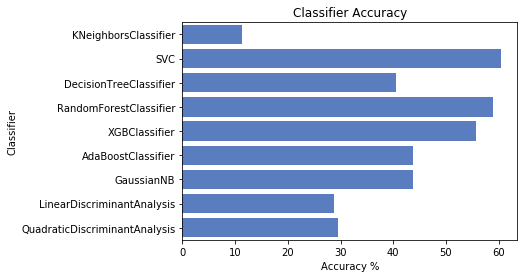

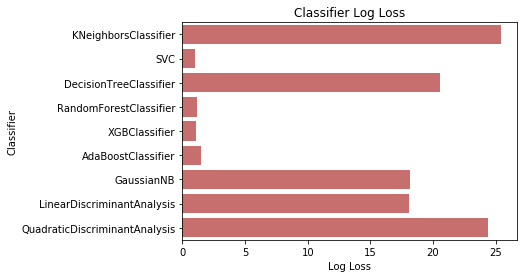

In [42]:
import seaborn as sns

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="r")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()